# ML EXAM2 -Unsupervised NehaL Bendale

In [28]:
#Load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
#! pip install yellowbrick
import yellowbrick
from yellowbrick.cluster import kelbow_visualizer,silhouette_visualizer,intercluster_distance
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load the dataset
df=pd.read_csv("credit_card.csv")

In [3]:
#EDA (Head)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
#Deleting the unwanted cols for model
df1=df.drop("CUST_ID",axis=1)

In [5]:
#EDA (Shape and size)
print("The number of rows and cols are",df.shape)
print("The number of data pts are",df.size)

The number of rows and cols are (8950, 18)
The number of data pts are 161100


In [6]:
#EDA (Info)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
#Check of missing values
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
df1["MINIMUM_PAYMENTS"]=df1["MINIMUM_PAYMENTS"].fillna(df1["MINIMUM_PAYMENTS"].mean())
df1=df1.dropna()

In [9]:
#Check of missing values
df1.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

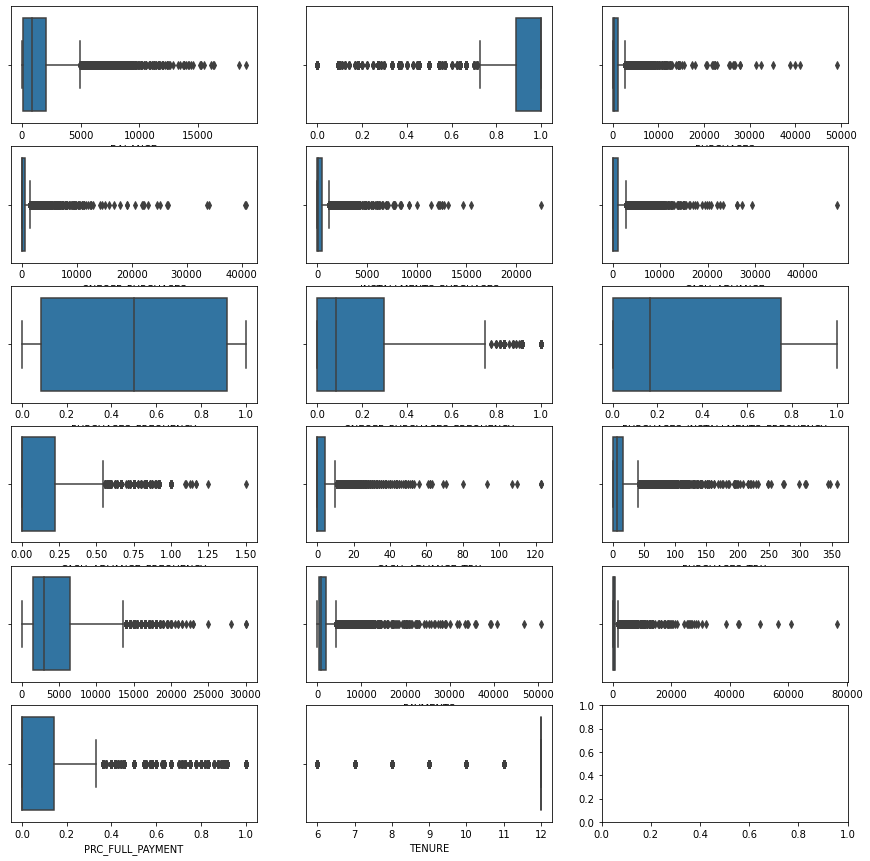

In [10]:
#Outliers detection
df1_cols=df1.columns
fig,ax=plt.subplots(nrows=6,ncols=3,figsize=[15,15])
for col,sub in zip(df1_cols,ax.flatten()):
    sns.boxplot(df[col],ax=sub)

# We will treat the outliers with the help of zscore method

In [11]:
#Treatment of outliers using z score
for col in df1.columns:
    mx = df1[col].mean() + 3*df1[col].std()
    mn = df1[col].mean() - 3*df1[col].std()

    df1[col] = np.where(
    df1[col]>mx,
    mx,
    np.where(
        df1[col]<mn,
        mn,
        df1[col]
        )
    )

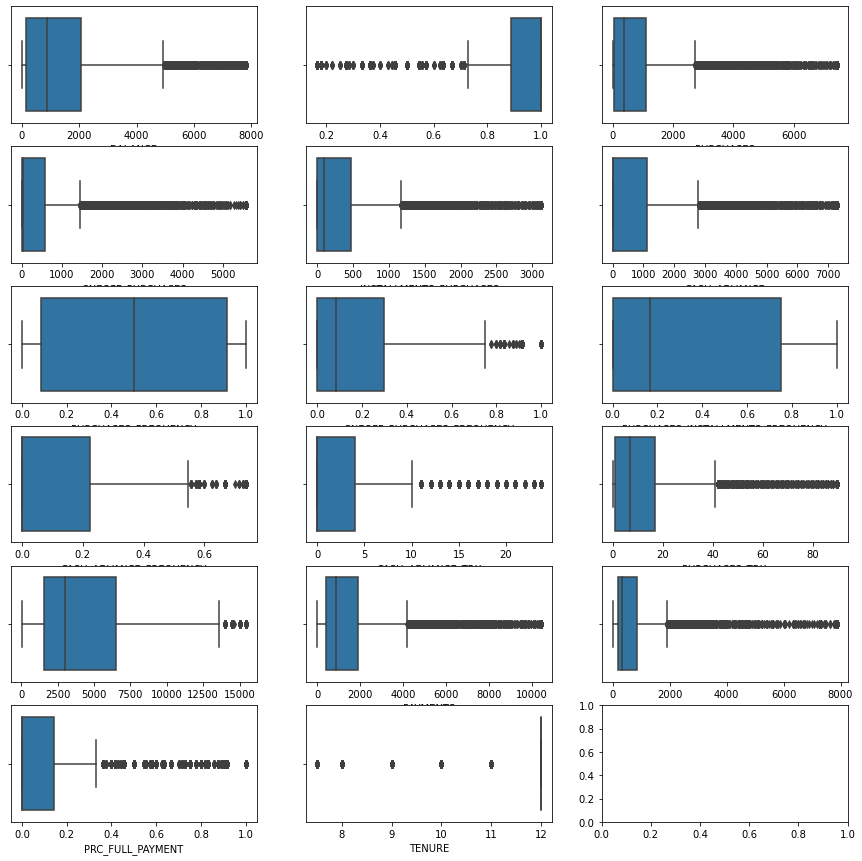

In [12]:
#Outliers detection
df1_cols=df1.columns
fig,ax=plt.subplots(nrows=6,ncols=3,figsize=[15,15])
for col,sub in zip(df1_cols,ax.flatten()):
    sns.boxplot(df1[col],ax=sub)

# Data standardization 

In [13]:
#Standardization using 
SS=StandardScaler()
Scaleddf=SS.fit_transform(df1)
Scaleddf

array([[-0.78506973, -0.26759915, -0.57471047, ..., -0.52516754,
        -0.52558844,  0.37369968],
       [ 0.8958157 ,  0.12872316, -0.64147144, ...,  0.26643561,
         0.2341587 ,  0.37369968],
       [ 0.51976118,  0.52504547, -0.10040661, ..., -0.11123998,
        -0.52558844,  0.37369968],
       ...,
       [-0.79437492, -0.20154761, -0.54042024, ..., -0.57361551,
         0.32912795, -3.46768164],
       [-0.79966023, -0.20154761, -0.64147144, ..., -0.59624161,
         0.32912795, -3.46768164],
       [-0.60866032, -0.92813633,  0.12358556, ..., -0.56863371,
        -0.52558844, -3.46768164]])

# PCA

In [14]:
#PCA
pca=PCA(0.95)
pca_result=pca.fit_transform(Scaleddf)
pca_result.shape

(8949, 11)

In [15]:
#Finding out the impt features from PCA
pca.explained_variance_ratio_

array([0.29737973, 0.22250453, 0.08691992, 0.07482469, 0.06238636,
       0.05426536, 0.0436578 , 0.03727322, 0.03300077, 0.02495766,
       0.01700707])

In [16]:
#Finding out the impt components
pca.n_components_

11

# Elbow method to find the number of components


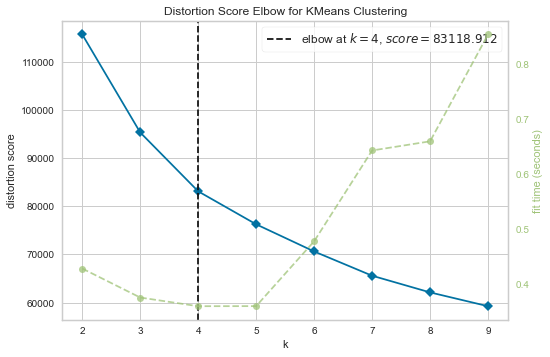

The best number of cluster is:  4


In [31]:
elbow_k = kelbow_visualizer(KMeans(random_state=4), pca_result, k=(2, 10))
kmeans = KMeans(n_clusters=elbow_k.elbow_value_, n_init=10, max_iter=1000)
label_pred = kmeans.fit_predict(pca_result)
print("The best number of cluster is: ", elbow_k.elbow_value_)

# KMeans with elbow method

In [41]:
#Model instantiate
Model=KMeans(n_clusters=4)
Model.fit(pca_result)
df1["Prediction using Kmeans Elbow Method"]=Model.predict(pca_result)
df1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Prediction using Kmeans,Prediction using Kmeans Elbow Method
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,0,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,2,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,1,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,864.206542,0.000000,12.0,0,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,0,0


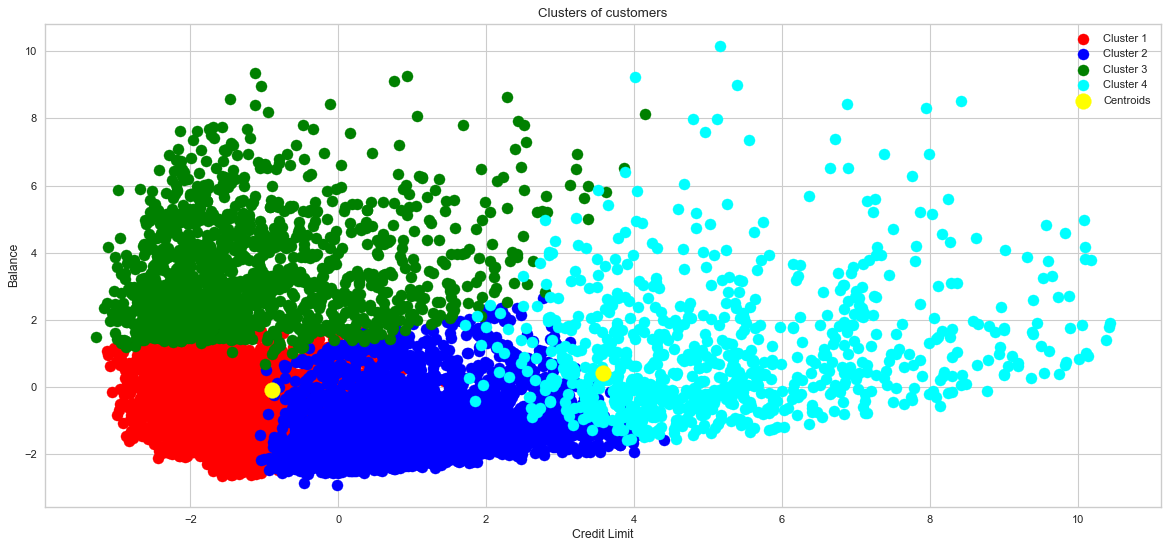

In [45]:
#Visulization
plt.figure(figsize=(18, 8), dpi=80)
plt.scatter(pca_result[df1["Prediction using Kmeans Elbow Method"] == 0, 0], pca_result[df1["Prediction using Kmeans Elbow Method"] == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(pca_result[df1["Prediction using Kmeans Elbow Method"] == 1, 0], pca_result[df1["Prediction using Kmeans Elbow Method"] == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(pca_result[df1["Prediction using Kmeans Elbow Method"] == 2, 0], pca_result[df1["Prediction using Kmeans Elbow Method"] == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(pca_result[df1["Prediction using Kmeans Elbow Method"] == 3, 0], pca_result[df1["Prediction using Kmeans Elbow Method"] == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(Model.cluster_centers_[:, 0], Model.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Credit Limit')
plt.ylabel('Balance')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

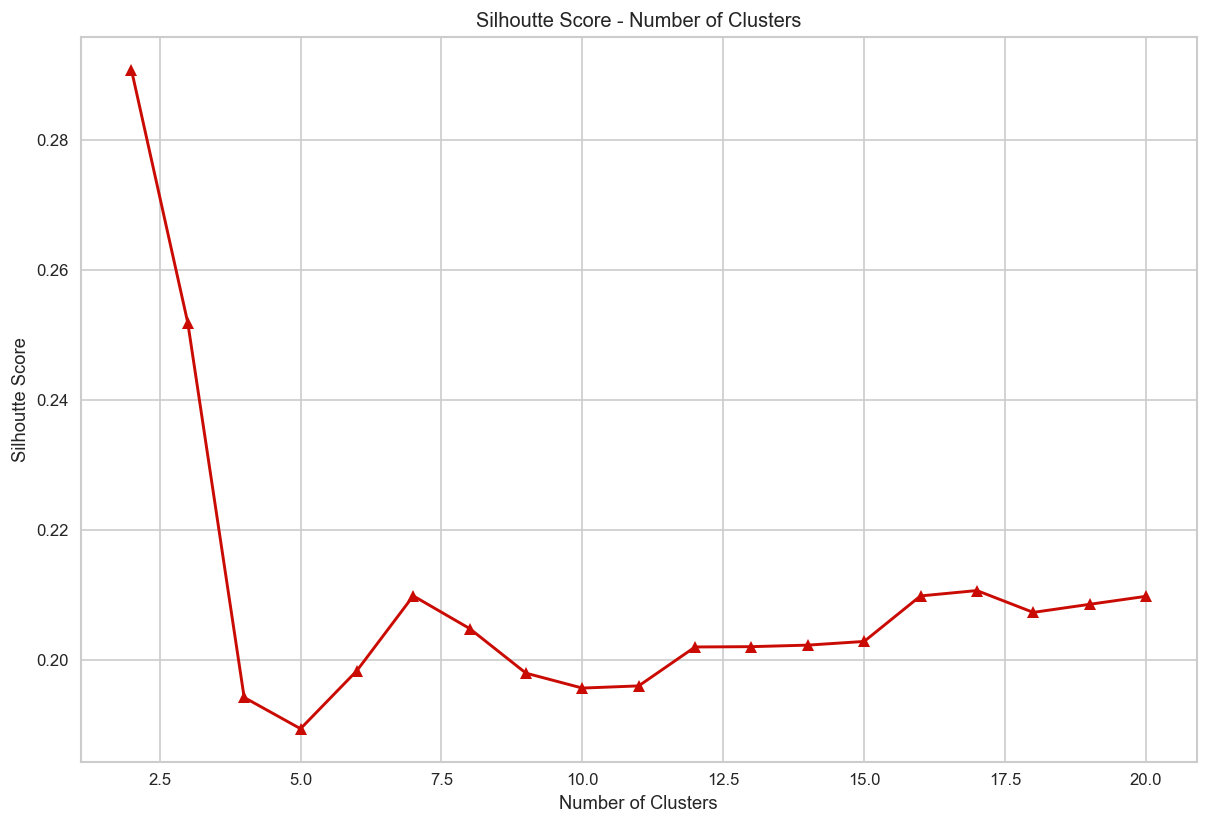

In [40]:
# Silhoutee Method
silhoutte_coefs = []

for k in range(2, 21):
    model = KMeans(n_clusters = k)
    model.fit(Scaleddf)
    silhoutte_coefs.append(metrics.silhouette_score(Scaleddf, model.labels_))

plt.figure(figsize = (12, 8), dpi = 120)
plt.plot(range(2, 21), silhoutte_coefs, color = 'r', marker = '^')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhoutte Score')
plt.title('Silhoutte Score - Number of Clusters')
plt.show()

Conclusion=2 clusters

# Kmeans with Silhoutee Method


In [42]:
#Model instantiate
Model=KMeans(n_clusters=2)
Model.fit(pca_result)
df1["Prediction using Kmeans Silhoutte Method"]=Model.predict(pca_result)
df1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Prediction using Kmeans,Prediction using Kmeans Elbow Method,Prediction using Kmeans Silhoutte Method
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,0,0,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,2,2,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,1,1,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,864.206542,0.000000,12.0,0,0,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,0,0,0


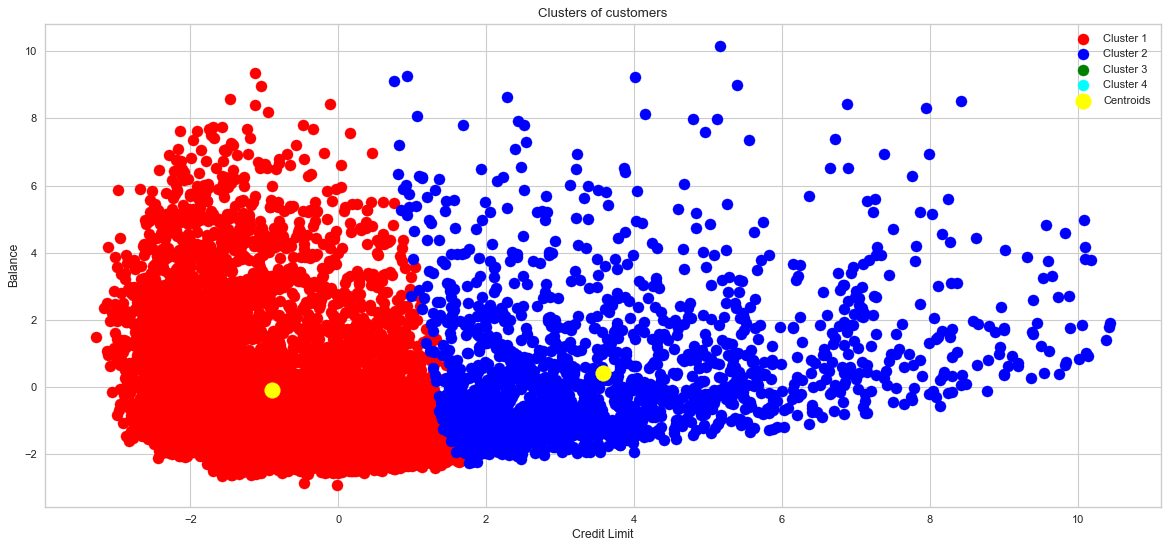

In [44]:
#Visulization
plt.figure(figsize=(18, 8), dpi=80)
plt.scatter(pca_result[df1["Prediction using Kmeans Silhoutte Method"] == 0, 0], pca_result[df1["Prediction using Kmeans Silhoutte Method"] == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(pca_result[df1["Prediction using Kmeans Silhoutte Method"] == 1, 0], pca_result[df1["Prediction using Kmeans Silhoutte Method"] == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(pca_result[df1["Prediction using Kmeans Silhoutte Method"] == 2, 0], pca_result[df1["Prediction using Kmeans Silhoutte Method"] == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(pca_result[df1["Prediction using Kmeans Silhoutte Method"] == 3, 0], pca_result[df1["Prediction using Kmeans Silhoutte Method"] == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(Model.cluster_centers_[:, 0], Model.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Credit Limit')
plt.ylabel('Balance')
plt.legend()
plt.show()

# Thank You